# NaiveBayes

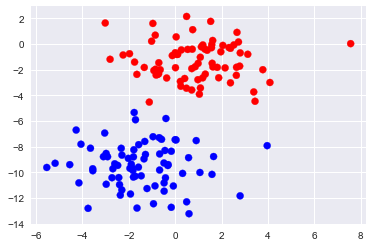

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.6)
# print(X)
# print(y), y is label, automatically set
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr');
# c : color, sequence, or sequence of color, optional
# s : size of dot
# cmap examples: 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'

In [ ]:
'''The data looks like it may be Gaussian distributed, so we assume the data is described 
by a Gaussian distribution with no covariance between dimensions'''

![Continuous_Variables](Continuous_Variables.png "Continuous_Variables_Gaussian")

-8 8 -15 5


[(-15, 5), (-8, 8)]

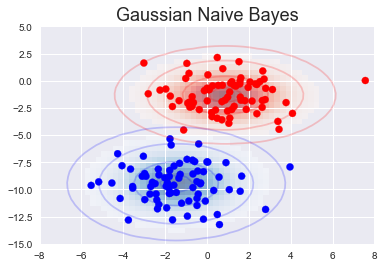

In [5]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
ax.set_title('Gaussian Naive Bayes', size=18)

xlim = (-8, 8)
ylim = (-15, 5)

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]
# Return evenly spaced numbers over a specified interval.
# Returns num evenly spaced samples, calculated over the interval [start, stop].
# The endpoint of the interval can optionally be excluded.
print(xlim[0],xlim[1],ylim[0],ylim[1])
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
# numpy.meshgrid(*xi, **kwargs)
# Return coordinate matrices from coordinate vectors.
# Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, 
# given one-dimensional coordinate arrays x1, x2,…, xn.

Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
# numpy.vstack(tup)
# Stack arrays in sequence vertically (row wise).
# This is equivalent to concatenation along the first axis after 1-D arrays of shape (N,) have been 
# reshaped to (1,N). Rebuilds arrays divided by vsplit.

for label, color in enumerate(['blue', 'red']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
#     numpy.prod(a, axis=None, dtype=None, out=None, keepdims=)
#     numpy.prod() returns the product of array elements over a given axis.
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

# numpy.prod(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
# Return the product of array elements over a given axis.
    
ax.set(xlim=xlim, ylim=ylim)

In [72]:
"Now, fit this data using GaussianNB from sklearn.naive_bayes"
#[Insert code here to use GaussianNB to fit the X,y data]

In [6]:
#Splitting data into 70% training and 30% test data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
#Standardizing the features:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# #The main reason to use statistics computed on only the training set is to avoid leaking information from the test set.
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

X_combined = np.vstack((X_train, X_test))
print(X_combined.shape)
y_combined = np.hstack((y_train, y_test))
print(y_combined.shape)

(150, 2)
(150,)


In [26]:
#define decision region code
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    x2_min, x2_max = X[:, 1].min() - 3, X[:, 1].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

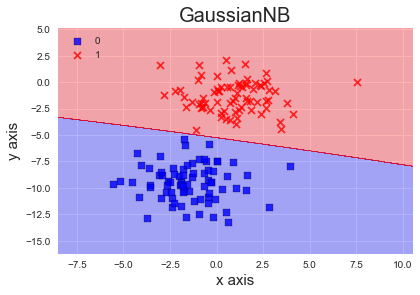

In [27]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

plot_decision_regions(X_combined, 
                      y_combined,
                      classifier=clf)
plt.xlabel('x axis', size = 15)
plt.ylabel('y axis', size = 15)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('GaussianNB', size=20)
plt.show()

In [28]:
# cross-validation score
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(clf, X_train, y_train, cv=5)
print("cross-validation score: {}".format(scores_train))
print("\nAccuracy in training: %0.2f (+/- %0.2f)\n" % (scores_train.mean(), scores_train.std() * 2))

# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X_test)
print("confusion_matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred)))
metrics.confusion_matrix(y_pred, y_test).tolist()[0][0]

from sklearn.metrics import classification_report
print("\nclassification_report:\n {}".format(classification_report(y_test, y_pred)))

cross-validation score: [1. 1. 1. 1. 1.]

Accuracy in training: 1.00 (+/- 0.00)

confusion_matrix: 
[[22  0]
 [ 0 23]]

classification_report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      1.00      1.00        23

avg / total       1.00      1.00      1.00        45



(2150, 2)
(2150,)


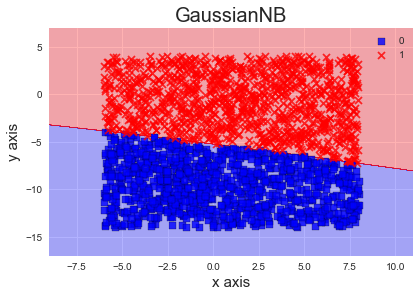

In [30]:
"Generate new data and predict the label using this model and plot it on the same figure"

#generating new data here
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

#[Insert code here to predict new labels ynew]
new_y_pred = clf.predict(Xnew)

#[Insert code here to plot the old+new data via scatter plot]
X_combined_with_Xnew = np.vstack((X_combined, Xnew))
print(X_combined_with_Xnew.shape)
y_combined_with_new_y_pred = np.hstack((y_combined, new_y_pred))
print(y_combined_with_new_y_pred.shape)

plot_decision_regions(X_combined_with_Xnew, 
                      y_combined_with_new_y_pred,
                      classifier=clf)
plt.xlabel('x axis', size = 15)
plt.ylabel('y axis', size = 15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('GaussianNB', size=20)
plt.show()

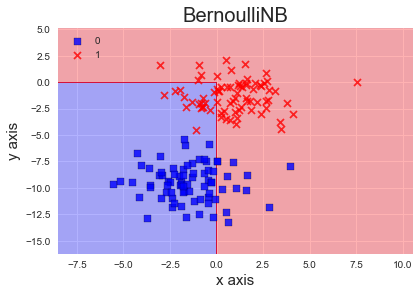

cross-validation score: [0.81818182 0.86363636 0.76190476 0.9        0.8       ]

Accuracy in training: 0.83 (+/- 0.10)

confusion_matrix: 
[[18  4]
 [ 5 18]]

classification_report:
              precision    recall  f1-score   support

          0       0.78      0.82      0.80        22
          1       0.82      0.78      0.80        23

avg / total       0.80      0.80      0.80        45

(2150, 2)
(2150,)


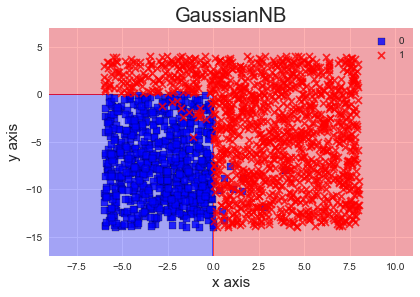

In [34]:
'''Now use Naive Bayes assuming a Bernoulli distribution'''
#[Insert code here to use BernoulliNB to fit the X,y data]
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

plot_decision_regions(X_combined, 
                      y_combined,
                      classifier=clf)
plt.xlabel('x axis', size = 15)
plt.ylabel('y axis', size = 15)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('BernoulliNB', size=20)
plt.show()

scores_train = cross_val_score(clf, X_train, y_train, cv=5)
print("cross-validation score: {}".format(scores_train))
print("\nAccuracy in training: %0.2f (+/- %0.2f)\n" % (scores_train.mean(), scores_train.std() * 2))

# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X_test)
print("confusion_matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred)))
metrics.confusion_matrix(y_pred, y_test).tolist()[0][0]

from sklearn.metrics import classification_report
print("\nclassification_report:\n {}".format(classification_report(y_test, y_pred)))


#generating new data here
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

#[Insert code here to predict new labels ynew using BernoulliNB]
new_y_pred = clf.predict(Xnew)

#[Insert code here to plot the old+new data via scatter plot]
X_combined_with_Xnew = np.vstack((X_combined, Xnew))
print(X_combined_with_Xnew.shape)
y_combined_with_new_y_pred = np.hstack((y_combined, new_y_pred))
print(y_combined_with_new_y_pred.shape)

plot_decision_regions(X_combined_with_Xnew, 
                      y_combined_with_new_y_pred,
                      classifier=clf)
plt.xlabel('x axis', size = 15)
plt.ylabel('y axis', size = 15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title('GaussianNB', size=20)
plt.show()